In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

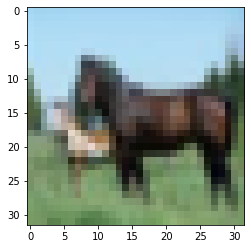

In [6]:
plt.imshow(x_train[12])

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [12]:
y_test[0]

array([3], dtype=uint8)

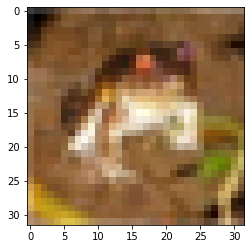

In [13]:
plt.imshow(x_train[0])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation = 'relu', ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation = 'relu', ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop= EarlyStopping(monitor='val_loss', patience=2)

In [19]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 27s 542us/sample - loss: 1.4847 - accuracy: 0.4620 - val_loss: 1.2674 - val_accuracy: 0.5503
Epoch 2/15
50000/50000 [==============================] - 20s 398us/sample - loss: 1.1590 - accuracy: 0.5904 - val_loss: 1.1312 - val_accuracy: 0.5979
Epoch 3/15
50000/50000 [==============================] - 27s 533us/sample - loss: 1.0112 - accuracy: 0.6443 - val_loss: 1.0100 - val_accuracy: 0.6415
Epoch 4/15
50000/50000 [==============================] - 41s 820us/sample - loss: 0.9056 - accuracy: 0.6831 - val_loss: 1.0115 - val_accuracy: 0.6465
Epoch 5/15
50000/50000 [==============================] - 36s 724us/sample - loss: 0.8232 - accuracy: 0.7124 - val_loss: 0.9483 - val_accuracy: 0.6716
Epoch 6/15
50000/50000 [==============================] - 31s 621us/sample - loss: 0.7430 - accuracy: 0.7399 - val_loss: 0.9818 - val_accuracy: 0.6674
Epoch 7/15
50000/50000 [====================

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.484673,0.46196,1.267362,0.5503
1,1.158999,0.59042,1.131198,0.5979
2,1.011154,0.64428,1.010011,0.6415
3,0.905553,0.68308,1.011538,0.6465
4,0.823156,0.71240,0.948297,0.6716
5,0.742986,0.73992,0.981838,0.6674
6,0.677997,0.76402,0.953498,0.6787


In [22]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

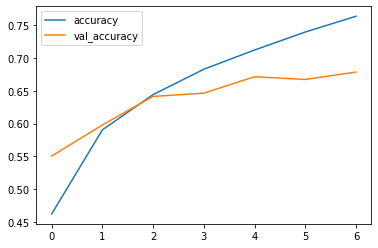

In [23]:
metrics[['accuracy','val_accuracy']].plot()

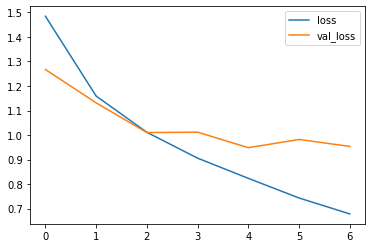

In [24]:
metrics[['loss', 'val_loss']].plot()

In [25]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 3s 346us/sample - loss: 0.9535 - accuracy: 0.6787


[0.9534983846664429, 0.6787]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
predictions = model.predict_classes(x_test)

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1000
           1       0.82      0.76      0.79      1000
           2       0.62      0.50      0.55      1000
           3       0.52      0.49      0.50      1000
           4       0.60      0.66      0.63      1000
           5       0.63      0.54      0.58      1000
           6       0.68      0.80      0.73      1000
           7       0.69      0.74      0.72      1000
           8       0.79      0.80      0.79      1000
           9       0.79      0.73      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



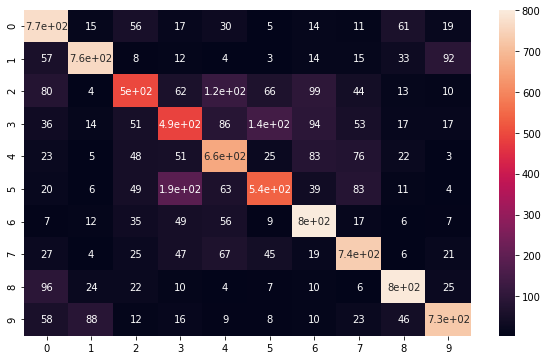

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

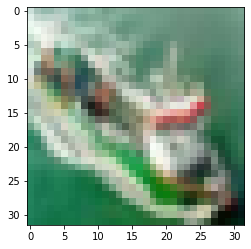

In [30]:
index = 15
single_image = x_test[index]
plt.imshow(single_image)

In [31]:
y_test[index]

array([8], dtype=uint8)

In [32]:
prediction = model.predict_classes(single_image.reshape(1,32,32,3))
print (prediction)

[6]


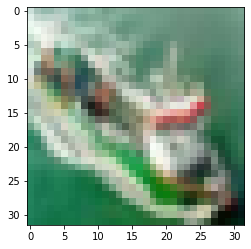

In [33]:
plt.imshow(single_image)
import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# This method only requires the image to explain and the model's predict function, which is what allows it to be model-agnostic
explanation = explainer.explain_instance(single_image, model.predict)

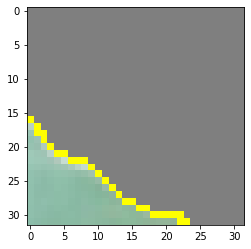

In [34]:
from skimage.segmentation import mark_boundaries
# Get image and mask shows us the superpixels that the model found to be
# most relevant to making a prediction
# The argument with the value of 1 in this method is the class that we want LIME to explain
# temp, mask = explanation.get_image_and_mask(0, positive_only=True, hide_rest=True, num_features = 5)
temp, mask = explanation.get_image_and_mask(8, positive_only=True, negative_only=False, hide_rest=True, num_features = 5, min_weight=0.0)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

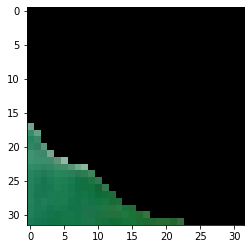

In [35]:
plt.imshow(temp)

In [44]:
import shap
import numpy as np
import tensorflow
model_small =tensorflow.keras.models.load_model('catsdogs-categorical-small')

In [45]:
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
e = shap.DeepExplainer(model_small, single_image.reshape(1,32,32,3))
shap_values = e.shap_values(x_test[1:5])
shap.image_plot(shap_values, -x_test[1:5])

AttributeError: 'NoneType' object has no attribute 'numpy'

In [38]:
x_train.shape[0]

50000

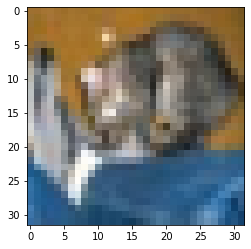

In [39]:
plt.imshow(x_test[0:5][0])

TypeError: Invalid shape (3,) for image data

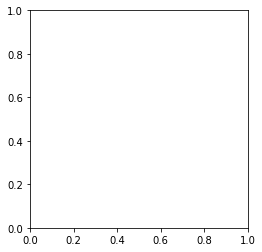

In [40]:
plt.imshow(x_test[0].shape)